In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
heartDF = pd.read_csv(r'C:\Users\44788\Desktop\coding\pynbs\Kaggle\heart.csv')

In [3]:
heartDF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
maxes = [ [] for _ in range(len(heartDF.columns)) ]
for i, col in enumerate(heartDF.columns):
    maxes[i].append([col, max(heartDF[col])])
maxes       

[[['age', 77]],
 [['sex', 1]],
 [['cp', 3]],
 [['trestbps', 200]],
 [['chol', 564]],
 [['fbs', 1]],
 [['restecg', 2]],
 [['thalach', 202]],
 [['exang', 1]],
 [['oldpeak', 6.2]],
 [['slope', 2]],
 [['ca', 4]],
 [['thal', 3]],
 [['target', 1]]]

In [4]:
null_data = [ [] for _ in range(len(heartDF.columns)) ]

for i, col in enumerate(heartDF.isnull().columns):
    counter = 0
    for value in col:
        if value == True:
            counter +=1
    null_data[i].append(counter)
null_data

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

Text(0.5, 1.0, 'maximum heart rate achieved vs target')

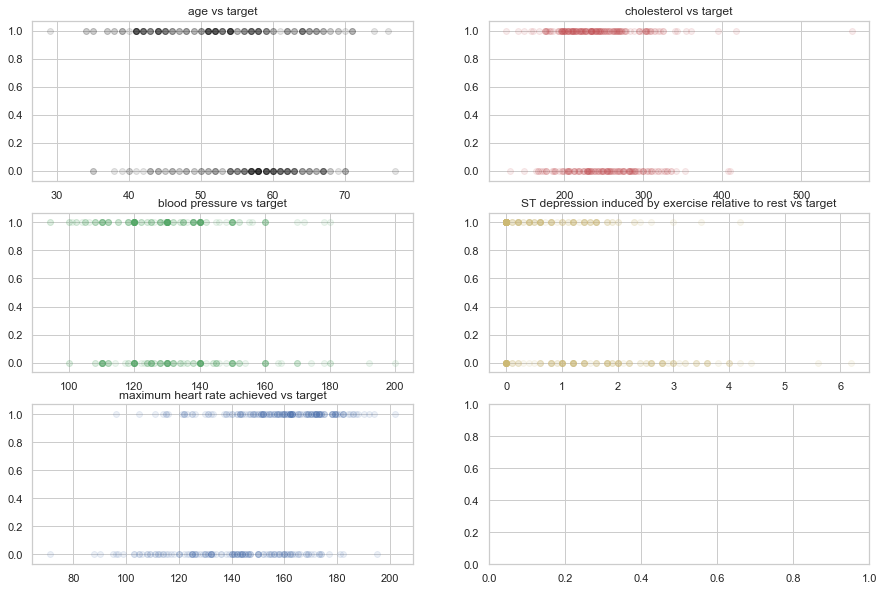

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs[0,0].scatter(heartDF.age, heartDF.target, alpha=0.1, color='black')
axs[0,0].set_title('age vs target')
axs[0,1].scatter(heartDF.chol, heartDF.target, alpha=0.1, color='r')
axs[0,1].set_title('cholesterol vs target')
axs[1,0].scatter(heartDF.trestbps, heartDF.target, alpha=0.1, color='g')
axs[1,0].set_title('blood pressure vs target')
axs[1,1].scatter(heartDF.oldpeak, heartDF.target, alpha=0.1, color='y')
axs[1,1].set_title('ST depression induced by exercise relative to rest vs target')
axs[2,0].scatter(heartDF.thalach, heartDF.target, alpha=0.1, color='b')
axs[2,0].set_title('maximum heart rate achieved vs target')

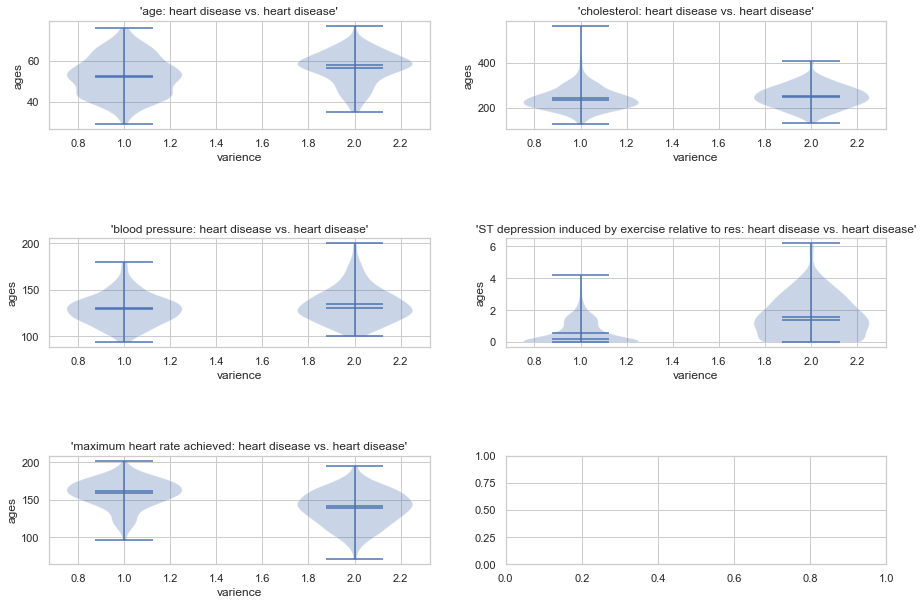

In [6]:
def if_target_or_no(columns, factor, target):
    new_column = []
    if target == True:
        for col,fac in zip(columns,factor):
            if fac == 1:
                new_column.append(col)
        return new_column
    else:
        for col,fac in zip(columns,factor):
            if fac == 0:
                new_column.append(col)
        return new_column


def drawViolinPlot(data, axis, xlabel, ylabel, bandwidth, title):
    axis.set_xlabel(xlabel);
    axis.set_ylabel(ylabel);
    axis.violinplot(data, showmeans=True, showmedians=True, bw_method=bandwidth);
    axis.set_title(title);
    
figure, axis = plt.subplots(3, 2, figsize=(15, 10));
plt.subplots_adjust(hspace=1);

bandwidth = None
drawViolinPlot((if_target_or_no(heartDF.age, heartDF.target, target=True), (if_target_or_no(heartDF.age, heartDF.target, target=False))), axis[0,0], 'varience', 'ages', bandwidth, "'age: heart disease vs. heart disease'")
drawViolinPlot((if_target_or_no(heartDF.chol, heartDF.target, target=True), (if_target_or_no(heartDF.chol, heartDF.target, target=False))), axis[0,1], 'varience', 'ages', bandwidth, "'cholesterol: heart disease vs. heart disease'")
drawViolinPlot((if_target_or_no(heartDF.trestbps, heartDF.target, target=True), (if_target_or_no(heartDF.trestbps, heartDF.target, target=False))), axis[1,0], 'varience', 'ages', bandwidth, "'blood pressure: heart disease vs. heart disease'")
drawViolinPlot((if_target_or_no(heartDF.oldpeak, heartDF.target, target=True), (if_target_or_no(heartDF.oldpeak, heartDF.target, target=False))), axis[1,1], 'varience', 'ages', bandwidth, "'ST depression induced by exercise relative to res: heart disease vs. heart disease'")
drawViolinPlot((if_target_or_no(heartDF.thalach, heartDF.target, target=True), (if_target_or_no(heartDF.thalach, heartDF.target, target=False))), axis[2,0], 'varience', 'ages', bandwidth, "'maximum heart rate achieved: heart disease vs. heart disease'")

In [7]:
param_names = []
for value in heartDF.columns:
    param_names.append(value)

In [8]:
from sklearn.preprocessing import StandardScaler
scaled =pd.DataFrame(StandardScaler().fit_transform(heartDF))
scaled_arrays = scaled.to_numpy().T

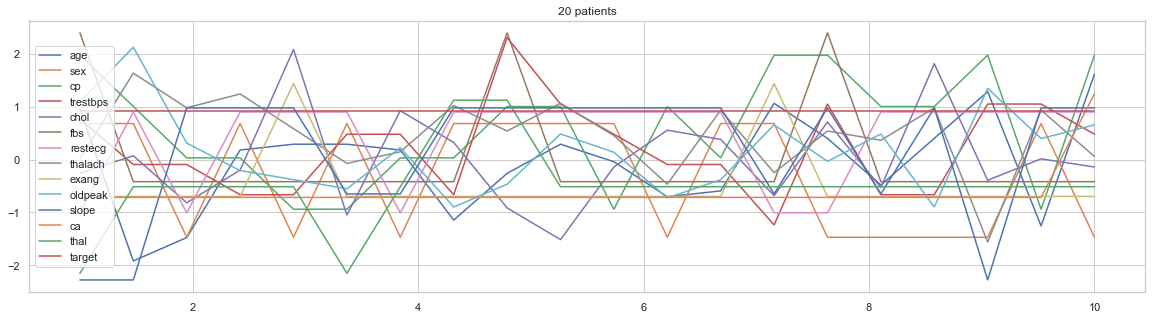

In [9]:
data_set = 20
x=np.linspace(1,10,data_set)

fig, axs = plt.subplots(1, 1, figsize=(20, 5))

for col, name in zip(scaled_arrays, param_names):
    axs.plot(x, col[:data_set], label=name)
    
title = ("%d" + ' patients') %data_set
axs.set_title(title)
axs.legend()
plt.show()

In [110]:
def find_proportion(columns, factor):
    counter = 0
    for col,fac in zip(columns,factor):
        if fac == 0 and col ==0:
            counter +=1
    return counter/len(columns) *100
def find_proportion2(columns, factor):
    counter = 0
    for col,fac in zip(columns,factor):
        if fac == 0 and col ==1:
            counter +=1
    return counter/len(columns) *100
def find_proportion3(columns, factor):
    counter = 0
    for col,fac in zip(columns,factor):
        if fac == 1 and col ==0:
            counter +=1
    return counter/len(columns) *100
def find_proportion4(columns, factor):
    counter = 0
    for col,fac in zip(columns,factor):
        if fac == 1 and col ==1:
            counter +=1
    return counter/len(columns) *100

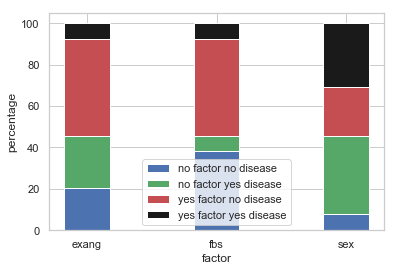

In [131]:
bar_list = ['exang', 'fbs','sex']
nono = [find_proportion(heartDF[columns],heartDF.target) for columns in bar_list]
noyes = [find_proportion2(heartDF[columns],heartDF.target) for columns in bar_list]
yesno = [find_proportion3(heartDF[columns],heartDF.target) for columns in bar_list]
yesyes = [find_proportion4(heartDF[columns],heartDF.target) for columns in bar_list]
noyeslis = list(np.array(nono)+np.array(noyes))
yesnolis = list(np.array(nono)+np.array(noyes)+np.array(yesno))

width = 0.35       

plt.bar(bar_list, nono, width, color='b', label='no factor no disease')
plt.bar(bar_list, noyes, width, bottom=nono, color='g', label='no factor yes disease')
plt.bar(bar_list, yesno, width, bottom=noyeslis, color='r', label='yes factor no disease')
plt.bar(bar_list, yesyes, width, bottom=yesnolis, color='k', label= 'yes factor yes disease')
plt.ylabel('percentage')
plt.xlabel('factor')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X = []
y = []
for age, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target in zip(heartDF['age'], heartDF['cp'], heartDF['trestbps'],\
                                                                                                    heartDF['chol'], heartDF['fbs'], heartDF['restecg'],\
                                                                                                    heartDF['thalach'], heartDF['exang'], heartDF['oldpeak'],\
                                                                                                    heartDF['slope'], heartDF['ca'], heartDF['thal'], heartDF['target']):
    X.append([age, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])
    y.append(target)

X = np.array(X)
y = np.array(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [35]:
class LogisticRegression:
    def __init__(self, lr=0.003, n_iters=10000, penalty=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.penalty = penalty
        self.weights = None
        self.bias = None
    def fit(self, X, Y):
        # initialise parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model) 
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-Y)) + (self.penalty * self.weights) #added regularization
            db = (1/n_samples) * np.sum(y_predicted-Y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, X):
        return 1/ (1+np.exp(-X))

In [36]:
def accuracy(Y_true, Y_pred):
    score = 0
    for element, element2 in zip(Y_true, Y_pred):
        if element == element2:
            score +=1
    accuracy = score / len(Y_true)
    return accuracy

In [37]:
regressor = LogisticRegression(0.0001, 10000, 0.5)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
print("LR classification accuracy", accuracy(Y_test, predictions))

LR classification accuracy 0.7236842105263158
